<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Proyecto Reducción de Dimensión</center></span>

<span style="color:black"><center>Práctica 2</center></span>

## <span style="color:blue">Profesores</span>

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
1. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com
1. Campo Elías Pardo Turriago, cepardot@unal.edu.co
1. Oleg Jarma, ojarmam@unal.edu.co

##   <span style="color:blue">Asesora Medios y Marketing digital</span>

Maria del Pilar Montenegro, pmontenegro88@gmail.com

### Librerías Necesarias 

In [1]:
import requests
from bs4 import BeautifulSoup
from html2text import html2text
import pandas as pd

###  Respuesta del servidor

In [2]:
# URL a analizar
url = 'https://www.eltiempo.com/colombia'
# Conectar con la url seleccionada
response = requests.get(url)
# Mostrar estado de conexión (200 -> OK)
print(response)

<Response [200]>


In [ ]:
from scrapy_news import get_news
import requests
from bs4 import BeautifulSoup
from html2text import html2text
import pandas as pd

url_root = 'https://www.eltiempo.com'
temas = ['colombia', 'bogota', 'mundo','politica','justicia','economia','deportes','cultura','tecnosfera']
urls = [url_root + '/' + tema for tema in temas]
#print(urls)

news_todo = pd.DataFrame([])

for url in urls:
    print(f'\n{url}...\n')
    df_news = get_news(url)
    news_todo = pd.concat((news_todo,df_news))

In [ ]:
### news_todo.to_csv('eltiempo_2022-11-17.csv',index=False)

### Análisis Explotario

In [4]:
import pandas as pd
news_todo = pd.read_csv('eltiempo_2022-11-17.csv')
news_todo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Titular  475 non-null    object
 1   Link     475 non-null    object
 2   Noticia  446 non-null    object
 3   Fecha    475 non-null    object
dtypes: object(4)
memory usage: 15.0+ KB


In [5]:
news_todo.dropna(inplace=True, subset='Noticia')

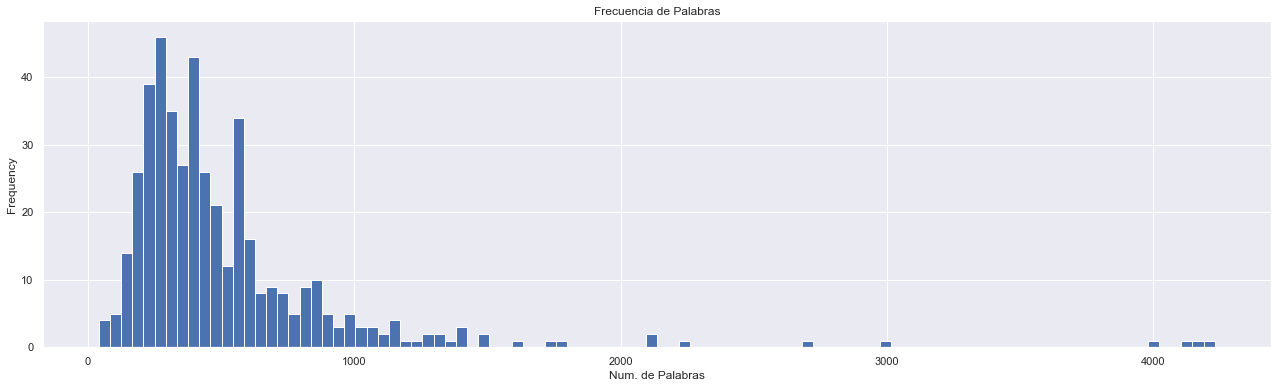

In [6]:
news_todo['Num_Pal'] = (news_todo['Noticia'].str.split().str.len().fillna(0)).astype(int)

# Gráficos bonitos con seaborn
import seaborn as sns
# Varios gráficos
import matplotlib.pyplot as plt
# Elegir seaborn como defecto para pandas
sns.set()

plt.figure(figsize=(22,6))

news_todo['Num_Pal'].plot(kind='hist',bins=100)
plt.title('Frecuencia de Palabras')
plt.xlabel('Num. de Palabras');

### Palabras Frecuentes

In [7]:
from collections import Counter
print(Counter(" ".join(news_todo["Noticia"]).split()).most_common(100))

[('de', 16124), ('la', 8711), ('que', 7461), ('en', 6866), ('el', 6380), ('y', 5793), ('a', 4588), ('los', 3211), ('del', 2820), ('se', 2648), ('las', 2378), ('un', 2358), ('por', 2216), ('con', 2184), ('una', 2054), ('para', 1879), ('su', 1730), ('es', 1374), ('no', 1370), ('al', 1069), ('como', 1049), ('lo', 1012), (',', 997), ('más', 901), ('El', 705), ('La', 698), ('sus', 658), ('este', 636), ('.', 635), ('En', 606), ('le', 589), ('ha', 555), ('fue', 533), ('o', 509), ('desde', 389), ('sobre', 372), ('también', 360), ('entre', 358), ('pero', 338), ('me', 338), ('han', 329), ('ser', 321), ('son', 316), ('esta', 311), ('muy', 309), ('ya', 309), ('millones', 309), ('está', 304), ('dos', 298), ('sin', 286), ('años', 281), ('hasta', 278), ('dijo', 257), ('porque', 251), ('parte', 250), ('año', 242), ('si', 241), ('tiene', 239), ('cuando', 238), ('era', 235), ('donde', 234), ('personas', 230), ('Los', 230), ('Por', 229), ('hay', 228), ('había', 227), ('e', 225), ('ese', 221), ('Y', 219),

In [8]:
from nltk.corpus import stopwords
stop = stopwords.words('spanish')

news_todo['Noticia_no_stpwds'] = news_todo['Noticia'].str.lower().apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

most_common = Counter(" ".join(news_todo["Noticia_no_stpwds"]).split())
print(most_common.most_common(100))

[(',', 997), ('.', 635), ('si', 325), ('ser', 322), ('según', 320), ('millones', 311), ('dos', 307), ('años', 283), ('dijo', 261), ('parte', 251), ('año', 242), ('personas', 233), ('solo', 221), ('tiempo', 215), ('así', 213), ('puede', 208), ('país', 206), ('presidente', 193), ('colombia', 189), ('gobierno', 188), ('hace', 187), ('gran', 180), ('sido', 179), ('además,', 171), ('hacer', 164), ('nacional', 155), ('mundo', 154), ('cuenta', 153), ('después', 151), ('medio', 149), ('vez', 149), ('acuerdo', 148), ('cada', 145), ('grupo', 144), ('que,', 142), ('vida', 140), ('primera', 138), ('tras', 135), ('tener', 133), ('tres', 132), ('autoridades', 131), ('debe', 129), ('mejor', 129), ('través', 127), ('años,', 127), ('pues', 122), ("'-", 122), ('varios', 121), ('luego', 120), ('empresario', 119), ('momento', 117), ('sino', 116), ('seguridad', 116), ('además', 115), ('primer', 115), ('mientras', 114), ('universidad', 114), ('forma', 113), ('trabajo', 113), ('manera', 112), ('hizo', 112), 

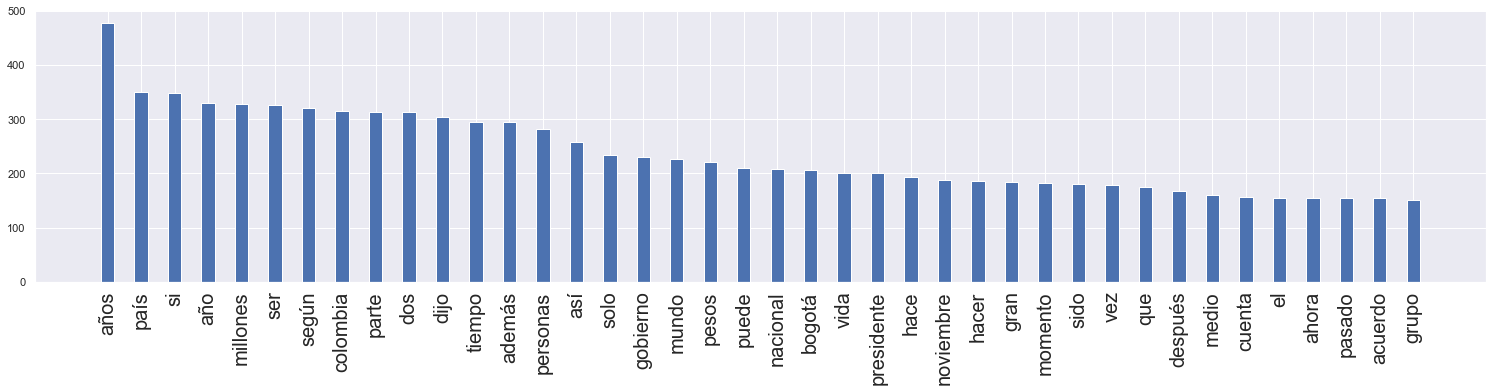

In [9]:
plt.figure(figsize = (26, 5))

news_todo['Noticia_no_stpwds_limpia'] = news_todo['Noticia_no_stpwds'].replace('[^\w+]|\d+|\s+|_',' ', regex=True).str.strip()

most_common = Counter(" ".join(news_todo["Noticia_no_stpwds_limpia"]).split())
most_common_show = most_common.most_common(40)

labels = list(list(zip(*most_common_show))[0])
values = list(list(zip(*most_common_show))[1])

plt.bar(labels, values, width = 0.4);
plt.xticks(labels, fontsize=20, rotation=90);

### Pasando Texto a Coordenadas Numéricas

In [10]:
from transformers import pipeline
from sentence_utils import split_into_sentences

from sentence_transformers import SentenceTransformer, util

model_name = 'hiiamsid/sentence_similarity_spanish_es'
model = SentenceTransformer(model_name_or_path=model_name, device='mps')

embedding_bert_train = model.encode(news_todo['Noticia'].values,show_progress_bar=True)

Batches:   0%|          | 0/14 [00:00<?, ?it/s]

In [13]:
embedding_bert_train.shape

(446, 768)

In [11]:
pd.DataFrame(embedding_bert_train).to_csv('eltiempo_2022-11-17_embedding.csv', index=False)

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.420994,0.010063,-0.284142,0.476748,-0.111510,0.193811,0.360858,0.505710,-0.334548,-0.324268,...,-0.063903,-0.041951,0.269442,0.055655,-0.256320,-0.586614,-0.280041,-0.550220,-0.140038,0.100138
1,-0.293106,0.340881,-0.091601,-0.051621,-0.650224,0.309396,0.568718,0.268754,-0.405978,-0.212730,...,-0.083177,-0.322267,0.484029,-0.006097,-0.299204,-0.494326,0.087931,-0.510175,0.074559,0.128205
2,0.203818,0.074216,-0.143623,0.231070,-0.172861,0.035109,0.532732,0.266484,-0.473271,-0.216459,...,0.273753,-0.164285,0.553218,-0.257009,-0.035423,-0.388759,-0.073919,-0.984970,-0.470205,0.057429
3,-0.121890,-0.118193,-0.130051,-0.389070,-0.402795,-0.102854,0.716964,-0.106863,-0.194864,-0.001418,...,0.122990,-0.368531,0.637866,-0.171940,-0.115915,-0.304980,0.106643,-0.372966,-0.410009,0.452453
4,-0.507796,0.530148,0.184120,0.289965,-0.229966,0.221273,0.549021,-0.456639,0.393649,-0.502686,...,0.028174,0.021764,0.349824,0.116141,0.096576,-0.069540,-0.191782,0.252578,-0.018218,0.316538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,-0.113998,-0.212939,0.015344,-0.077700,-0.372841,-0.213683,0.005778,0.080563,-0.162463,0.510620,...,0.197458,-0.020250,-0.199524,0.261658,-0.463010,-0.415437,-0.118273,-0.436509,-0.199221,0.366038
442,0.161971,0.104444,0.037926,0.555458,-0.086597,-0.548284,0.607360,-0.146121,-0.244848,0.046677,...,0.020384,-0.576412,0.323478,-0.142720,-0.031730,-0.620635,-0.197747,-0.252856,0.212914,0.454291
443,0.035809,0.233638,-0.048407,0.308832,-0.042877,-0.303110,0.766203,-0.109391,-0.302924,-0.038507,...,-0.097956,-0.486249,0.319424,-0.021307,-0.063400,-0.552363,-0.216515,-0.215940,0.230110,0.375180
444,0.257387,0.115049,-0.125529,0.179779,0.091976,-0.442103,0.725120,-0.222095,-0.285224,-0.148653,...,-0.230627,-0.514753,0.356151,-0.044537,-0.133562,-0.790154,-0.163495,-0.339011,0.253793,0.497645


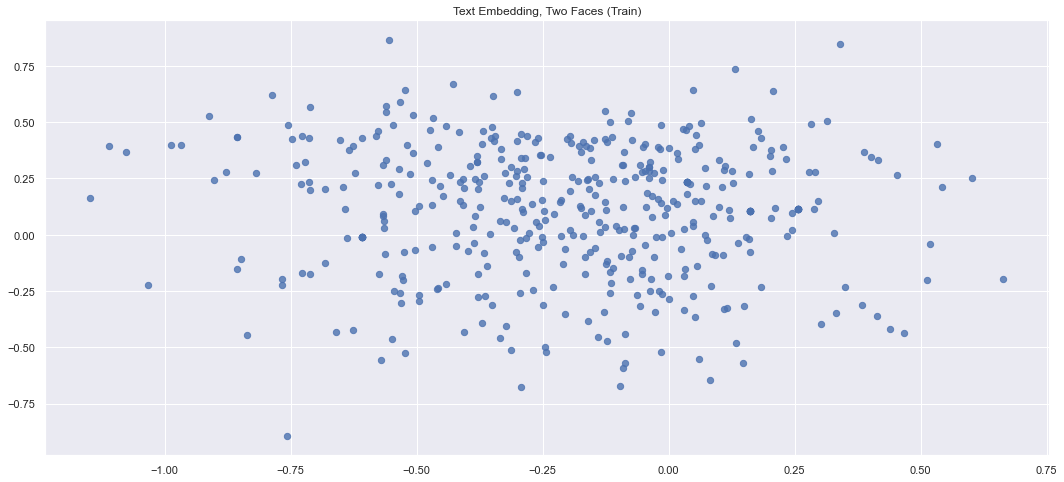

In [14]:
fig, ax1 = plt.subplots(1, figsize=(18, 8))
sc = ax1.scatter(embedding_bert_train[:,0],embedding_bert_train[:,1], s=40, alpha=0.8)
ax1.set_title('Text Embedding, Two Faces (Train)');

### Reduciendo Dimensión

In [15]:
import umap

%matplotlib widget
# UMAP Hiperparameters
n_components = 3
n_neighbors = 20
min_dist = 0.

reducer_super = umap.UMAP(n_components=n_components,n_neighbors=n_neighbors,min_dist=min_dist,random_state=42, metric='euclidean')

embedding_train = reducer_super.fit(embedding_bert_train)
embedding_train = reducer_super.transform(embedding_bert_train)

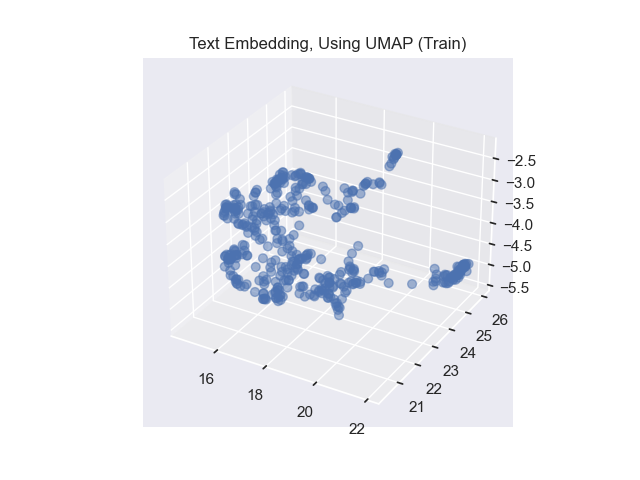

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(embedding_train[:,0],embedding_train[:,1],embedding_train[:,2], s=40, alpha=0.5)
ax.set_title('Text Embedding, Using UMAP (Train)');

### Hallando Grupos en los Datos (Clustering)

In [17]:
import hdbscan

hdbscan_labels = hdbscan.HDBSCAN(min_samples=20, min_cluster_size=15).fit_predict(embedding_train)
hdbscan_labels

array([ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        0,  2,  2, -1,  2,  2,  2,  2,  0,  2,  0,  2,  2,  2, -1,  0,  2,
        2,  2,  2,  2,  0,  2,  2,  0,  0,  0,  0, -1,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,  2,  2,  2,  2,  2,  2,
       -1,  2, -1, -1,  2,  0, -1,  0,  0,  0, -1,  1,  2,  1, -1,  1,  2,
        2, -1, -1,  2,  1,  2,  2,  1,  2,  1,  0,  2, -1,  2,  2,  2,  0,
        0,  2,  2,  2,  0,  2,  0,  2,  2, -1,  2,  2,  2,  2,  2,  2,  2,
       -1, -1,  1, -1,  2,  1,  1,  1, -1,  1,  2,  2, -1,  1,  1,  1,  1,
        1,  2,  2, -1, -1,  2,  2,  2,  2,  2,  0,  0,  0, -1,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  0,  0,  0, -1,  0,
        2,  2, -1,  0,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,  0,  0,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2

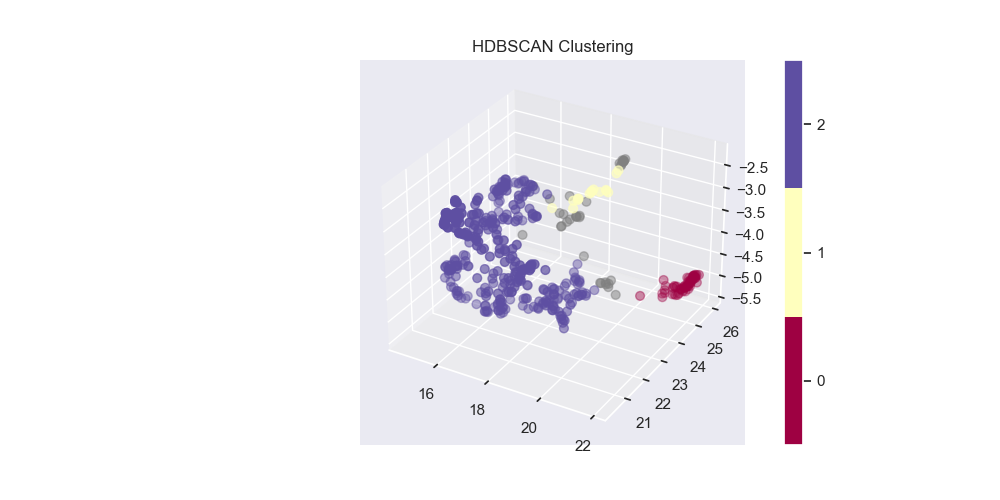

In [18]:
import numpy as np

clustered = (hdbscan_labels >= 0)

labels = np.unique(hdbscan_labels[hdbscan_labels >= 0])


%matplotlib widget

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(embedding_train[~clustered, 0],
            embedding_train[~clustered, 1],
            embedding_train[~clustered, 2],
            color=(0.5, 0.5, 0.5),
            s=40,
            alpha=0.5)
sc = ax.scatter(embedding_train[clustered, 0],
            embedding_train[clustered, 1],
            embedding_train[clustered, 2],
            c=hdbscan_labels[clustered],
            s=40,
            cmap='Spectral');
cbar = fig.colorbar(sc,ax=ax,boundaries=np.arange(len(labels)+1)-0.5)
cbar.set_ticks(np.arange(len(labels)))
cbar.set_ticklabels(labels)
ax.set_title('HDBSCAN Clustering');

In [19]:
news_todo['Cluster'] = hdbscan_labels

news_todo[news_todo['Cluster']==1]

,Titular,Link,Noticia,Fecha,Num_Pal,Noticia_no_stpwds,Noticia_no_stpwds_limpia,Cluster
92,EE. UU.: Nancy Pelosi dice que renunciará a se...,https://www.eltiempo.com/mundo/eeuu-y-canada/n...,"La demócrata Nancy Pelosi, presidenta de la Cá...","17 de noviembre 2022, 08:50 A. M.\n\n",103,"demócrata nancy pelosi, presidenta cámara repr...",demócrata nancy pelosi presidenta cámara repr...,1
95,Estados Unidos: ¿qué significa para Biden el t...,https://www.eltiempo.com/mundo/eeuu-y-canada/e...,Las elecciones de medio mandato en Estados Uni...,"17 de noviembre 2022, 08:50 A. M.\n\n",960,elecciones medio mandato unidos dejado congres...,elecciones medio mandato unidos dejado congres...,1
97,Noche trágica en Irán: al menos 12 muertos en ...,https://www.eltiempo.com/mundo/asia/iran-cifra...,Irán vivió una violenta noche con movilizacion...,"17 de noviembre 2022, 08:50 A. M.\n\n",760,irán vivió violenta noche movilizaciones largo...,irán vivió violenta noche movilizaciones largo...,1
103,"¿Quién es Kevin McCarthy, el líder de los rep...",https://www.eltiempo.com/mundo/eeuu-y-canada/q...,El republicano Kevin McCarthy fue elegido este...,"17 de noviembre 2022, 08:50 A. M.\n\n",313,republicano kevin mccarthy elegido martes cole...,republicano kevin mccarthy elegido martes cole...,1
107,Estados Unidos: Mike Pence no testificará sob...,https://www.eltiempo.com/mundo/eeuu-y-canada/m...,El exvicepresidente de Estados Unidos Mike Pen...,"17 de noviembre 2022, 08:50 A. M.\n\n",279,exvicepresidente unidos mike pence cerró miérc...,exvicepresidente unidos mike pence cerró miérc...,1
109,Ivanka Trump se aparta de campaña de su padre...,https://www.eltiempo.com/mundo/eeuu-y-canada/i...,El expresidente de Estados Unidos Donald Trump...,"17 de noviembre 2022, 08:50 A. M.\n\n",354,expresidente unidos donald trump contará hija ...,expresidente unidos donald trump contará hija ...,1
139,Turquía: ataque terrorista con bomba dejó al ...,https://www.eltiempo.com/mundo/asia/turquia-at...,Un atentado terrorista con bomba causó este do...,"17 de noviembre 2022, 08:50 A. M.\n\n",388,atentado terrorista bomba causó domingo menos ...,atentado terrorista bomba causó domingo menos ...,1
142,"Sismo de magnitud 6,1 sacude Japón sin alerta...",https://www.eltiempo.com/mundo/asia/sismo-hoy-...,"Un terremoto de magnitud preliminar 6,1 se dej...","17 de noviembre 2022, 08:50 A. M.\n\n",236,"terremoto magnitud preliminar 6,1 dejó sentir ...",terremoto magnitud preliminar dejó sentir ...,1
143,Detenida por atentado en Estambul sería de Si...,https://www.eltiempo.com/mundo/asia/sospechosa...,En la concurrida calle Istiklal en la capital ...,"17 de noviembre 2022, 08:50 A. M.\n\n",268,concurrida calle istiklal capital turca estamb...,concurrida calle istiklal capital turca estamb...,1
144,Turquía: detienen a mujer sospechosa de haber...,https://www.eltiempo.com/mundo/asia/turquia-un...,Una persona fue detenida como sospechosa de co...,"17 de noviembre 2022, 08:50 A. M.\n\n",514,persona detenida sospechosa colocar bomba esta...,persona detenida sospechosa colocar bomba esta...,1


### K-means 

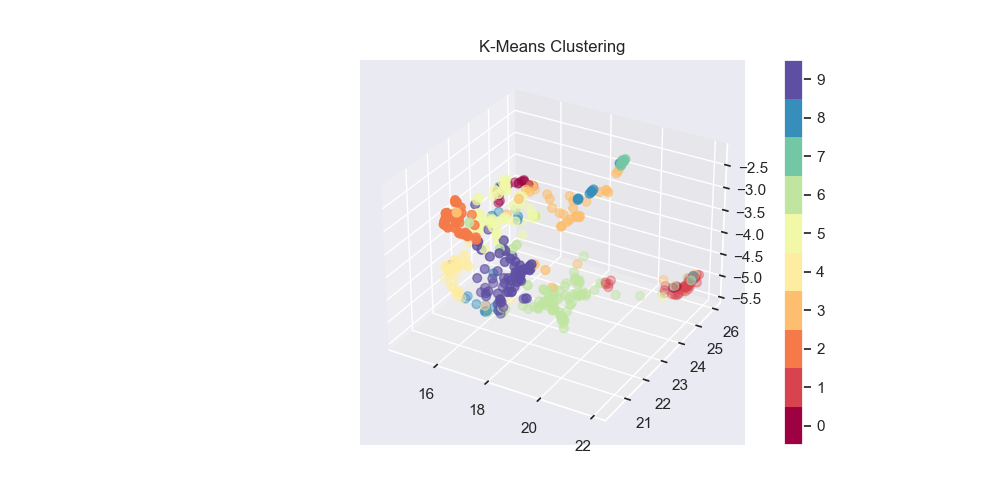

In [20]:
import sklearn.cluster as cluster
kmeans_labels = cluster.KMeans(n_clusters=10).fit_predict(embedding_bert_train)
k_labels = np.unique(kmeans_labels)

%matplotlib widget

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(*embedding_train.T,
            c=kmeans_labels,
            s=40,
            cmap='Spectral');
cbar = fig.colorbar(sc,ax=ax,boundaries=np.arange(len(k_labels)+1)-0.5)
cbar.set_ticks(np.arange(len(k_labels)))
cbar.set_ticklabels(k_labels)
ax.set_title('K-Means Clustering');

In [21]:
news_todo['K_Cluster'] = kmeans_labels

In [22]:
news_todo[news_todo['K_Cluster']==0]

,Titular,Link,Noticia,Fecha,Num_Pal,Noticia_no_stpwds,Noticia_no_stpwds_limpia,Cluster,K_Cluster
207,Si le llegan estos mensajes a su celular tenga...,https://www.eltiempo.com/justicia/servicios/es...,"Con la llegada de la Navidad, los delincuentes...","17 de noviembre 2022, 08:50 A. M.\n\n",555,"llegada navidad, delincuentes ven oportunidad ...",llegada navidad delincuentes ven oportunidad ...,-1,0
309,Mundial Qatar 2022: así puede evitar fallas d...,https://www.eltiempo.com/deportes/futbol-inter...,El Mundial de Qatar 2022 está a la vuelta de l...,"17 de noviembre 2022, 08:50 A. M.\n\n",599,mundial qatar 2022 vuelta esquina. bien saben ...,mundial qatar vuelta esquina bien saben sel...,2,0
428,Los iPhone 14 y otros productos Apple que se p...,https://www.eltiempo.com/tecnosfera/dispositiv...,Este miércoles el Tribunal Superior del Distri...,"17 de noviembre 2022, 08:50 A. M.\n\n",379,miércoles tribunal superior distrito judicial ...,miércoles tribunal superior distrito judicial ...,0,0
429,Este es el procesador que tendrán los celulare...,https://www.eltiempo.com/tecnosfera/novedades-...,"En el marco del Snapdragon Summit 2022, la reu...","17 de noviembre 2022, 08:50 A. M.\n\n",549,"marco snapdragon summit 2022, reunión anual ma...",marco snapdragon summit reunión anual marca...,2,0
432,"Computadores, realidad aumentada y audio, la ...",https://www.eltiempo.com/tecnosfera/novedades-...,Así como en el marco del Snapdragon Summit se ...,"17 de noviembre 2022, 08:50 A. M.\n\n",592,así marco snapdragon summit revelaron cartas n...,así marco snapdragon summit revelaron cartas n...,2,0
439,Oracle Alloy: la plataforma que convertirá a ...,https://www.eltiempo.com/tecnosfera/novedades-...,"El gran evento anual de Oracle, Cloud World , ...","17 de noviembre 2022, 08:50 A. M.\n\n",538,"gran evento anual oracle, cloud world , retoma...",gran evento anual oracle cloud world retoma...,2,0
441,"AMD lanza los nuevos Epyc Genoa, sus nuevas C...",https://www.eltiempo.com/tecnosfera/novedades-...,"Este jueves, 10 de noviembre, Lisa Su, directo...","17 de noviembre 2022, 08:50 A. M.\n\n",390,"jueves, 10 noviembre, lisa su, directora amd, ...",jueves noviembre lisa su directora amd p...,2,0
442,¿Por qué se cierran solas las 'apps' de mi ce...,https://www.eltiempo.com/tecnosfera/apps/andro...,Se ha preguntado ¿por qué se cierran solas las...,"17 de noviembre 2022, 08:50 A. M.\n\n",246,preguntado ¿por cierran solas aplicaciones cel...,preguntado por cierran solas aplicaciones cel...,2,0
448,El iPhone tiene la mejor alarma para no queda...,https://www.eltiempo.com/tecnosfera/dispositiv...,Para muchas personas levantarse en las mañanas...,"17 de noviembre 2022, 08:50 A. M.\n\n",284,muchas personas levantarse mañanas actos difíc...,muchas personas levantarse mañanas actos difíc...,2,0
449,En cuánto se vendería el iPhone 14 y cuándo l...,https://www.eltiempo.com/tecnosfera/dispositiv...,"Recientemente, se dio a conocer que el Tribuna...","17 de noviembre 2022, 08:50 A. M.\n\n",283,"recientemente, dio conocer tribunal superior d...",recientemente dio conocer tribunal superior d...,0,0


### Despliegue del Modelo (Gradio)

In [29]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
news_todo

In [78]:
import os
import gradio as gr
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px # for data visualization

def filter_map():

    fig = px.scatter_3d(data_frame=news_todo, 
                        x=embedding_train[:,0], y=embedding_train[:,1], z=embedding_train[:,2],
                        color='K_Cluster',
                        height=400, width=1200,
                        #text='Titular'
                       )

    # Update chart looks
    fig.update_layout(title_text="Scatter 3D Plot",
                      showlegend=True,
                      legend=dict(orientation="h", yanchor="top", y=0, xanchor="center", x=0.5),
                      scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                            center=dict(x=0, y=0, z=-0.2),
                                            eye=dict(x=-1.5, y=1.5, z=0.5)),
                                            margin=dict(l=0, r=0, b=0, t=0),

                      scene = dict(xaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                             ),
                                   yaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                              ),
                                   zaxis=dict(backgroundcolor='lightgrey',
                                              color='black', 
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                             )))

    # Update marker size
    fig.update_traces(marker=dict(size=4))


    return fig

with gr.Blocks() as demo:
    with gr.Column():
        map = gr.Plot()
    demo.load(filter_map,outputs=map)

demo.launch()

Running on local URL:  http://127.0.0.1:7872

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x3d73613d0>, 'http://127.0.0.1:7872/', None)

### Dockerizando APP